# DESKRIPSI PROYEK

Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat churn klien mereka.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰

**Layanan Interconnect**

󠀰Interconnect menyediakan dua jenis layanan utama:

1. Jaringan telepon rumah.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀦󠀳󠀰 Telepon bisa disambungkan ke beberapa saluran secara bersamaan.
2. Internet.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀨󠀳󠀰 Jaringan internet dapat diatur melalui saluran telepon (DSL, *digital subscriber line*) atau melalui kabel serat optik.

󠀰Beberapa layanan lain yang disediakan Interconnect meliputi:

- Keamanan Internet: perangkat lunak antivirus (*DeviceProtection*) dan pemblokir situs web berbahaya (*OnlineSecurity*)
- Jalur dukungan teknis khusus (*TechSupport*)
- Penyimpanan *cloud* untuk *file* dan *backup* data (*OnlineBackup*)
- *Streaming* TV (*StreamingTV*) dan direktori film (*StreamingMovies*)

Klien dapat memilih untuk melakukan pembayaran secara bulanan atau menandatangani kontrak untuk berlangganan selama 1 atau 2 tahun.󠀲󠀡󠀠󠀥󠀨󠀣󠀥󠀥󠀳󠀰 Mereka bisa menggunakan beragam metode pembayaran dan menerima tagihan elektronik setelah melakukan transaksi.

**Deskripsi Data**

󠀰Data yang tersedia terdiri dari beberapa *file* yang didapat dari sumber berbeda:

- `contract.csv` — 󠀰informasi kontrak
- `personal.csv` — 󠀰data personal klien
- `internet.csv` — informasi tentang layanan Internet
- `phone.csv` — informasi tentang layanan telepon

Pada setiap *file*, Anda bisa menemukan kolom `customerID` dengan kode unik yang ditetapkan untuk setiap klien.

Informasi kontrak berlaku per tanggal 1 Februari 2020.

## Library

In [198]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

#xgboost
import xgboost as xgb

#lightGBM
import lightgbm as lgb

#Catboost
!pip install catboost
from catboost import CatBoostClassifier

#tensor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import time
import warnings
warnings.filterwarnings('ignore')

## File Path

󠀰Data yang tersedia terdiri dari beberapa *file* yang didapat dari sumber berbeda:

- `contract.csv` — 󠀰informasi kontrak
- `personal.csv` — 󠀰data personal klien
- `internet.csv` — informasi tentang layanan Internet
- `phone.csv` — informasi tentang layanan telepon

Pada setiap *file*, Anda bisa menemukan kolom `customerID` dengan kode unik yang ditetapkan untuk setiap klien.

Informasi kontrak berlaku per tanggal 1 Februari 2020.

In [146]:
#path_contract = '/datasets/final_provider/contract.csv'
#path_internet = '/datasets/final_provider/internet.csv'
#path_personal = '/datasets/final_provider/personal.csv'
#path_phone = '/datasets/final_provider/phone.csv'
#path_result = '/home/jovyan/work/Final_Project/hasil.csv'


path_contract = '/content/contract.csv'
path_internet = '/content/internet.csv'
path_personal = '/content/personal.csv'
path_phone = '/content/phone.csv'
path_result = '/content/hasil.csv'

## EDA

### Datasets contract

Fitur yang tersedia Pada Datasets contract:

- `customerID` — 󠀰nilai unique customer
- `BeginDate` — 󠀰tanggal mulai customer berlangganan
- `EndDate` — tanggal terakhir customer berlangganan/berhenti
- `Type` — tipe pembayaran dalam timeframe
- `PaperlessBilling` — bukti pembayaran di cetak atau tidak
- `PaymentMethod` — metode pembayaran
- `MonthlyCharges` — tagihan bulanan customer
- `TotalCharges` — Total tagihan customer dari awal berlangganan


In [147]:
df_contract = pd.read_csv(path_contract)
df_contract.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6499,2676-ISHSF,2020-01-01,No,Month-to-month,No,Mailed check,20.3,20.3


In [148]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [149]:
df_contract.duplicated().sum()

0

#### Memeriksa nilai Unique

In [150]:
df_contract['BeginDate'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [151]:
df_contract['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [152]:
df_contract['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [153]:
#Melihat jumlah string kosong pada kolom total charges
df_contract[df_contract['TotalCharges'] == ' ']['TotalCharges'].count()

11

In [154]:
#Merubah string kosong pada kolom total charges menjadi 0
df_contract.loc[df_contract['TotalCharges'] == ' ','TotalCharges'] = 0

data dari kolom `begindate` dan `totalcharges` tidak ada masalah pada datanya, bisa kita rubah tipe data sesuai dengan yang kita butuhkan, tetapi untuk kolom `EndDate` dikarenakan ada beberapa data yang berisi `No` yang menandakan customer belum berhenti, maka dari itu tipe datanya akan di biarkan tetap object.

#### Memperbaiki tipe data

Merubah tipe data yang kurang tepat,
- `BeginDate` — 󠀰datetime
- `EndDate` — 󠀰datetime
- `TotalCharges` — float


In [155]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

In [156]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

In [157]:
df_contract.dtypes

customerID                  object
BeginDate           datetime64[ns]
EndDate                     object
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
dtype: object

#### Kesimpulan sementara

datasets contract sudah bisa diolah lebih lanjut

### Datasets internet

Fitur yang tersedia Pada Datasets Internet:

- `customerID` — 󠀰nilai unique customer
- `InternetService` — customer menggunakan layanan tersebut atau tidak
- `OnlineSecurity` — customer menggunakan layanan tersebut atau tidak
- `OnlineBackup` — customer menggunakan layanan tersebut atau tidak
- `DeviceProtection` — customer menggunakan layanan tersebut atau tidak
- `TechSupport` — customer menggunakan layanan tersebut atau tidak
- `StreamingTV` — customer menggunakan layanan tersebut atau tidak
- `StreamingMovies` — customer menggunakan layanan tersebut atau tidak


In [158]:
df_internet = pd.read_csv(path_internet)
df_internet.sample()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4641,6261-RCVNS,DSL,Yes,Yes,Yes,Yes,No,Yes


In [159]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [160]:
df_internet.duplicated().sum()

0

#### Memeriksa nilai Unique

In [161]:
df_internet['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [162]:
df_internet['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [163]:
df_internet['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [164]:
df_internet['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [165]:
df_internet['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [166]:
df_internet['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [167]:
df_internet['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

#### Kesimpulan sementara

Datasets internet tidak ada yang bermasalah pada datanya, tetapi jumlah data yang ada yaitu `5517`, sedangkan untuk jumlah data pada dataset contract adalah `7043`, mungkin di bawah kita akan cek lebih lanjut dimana perbedaan nya,
apakah perbedaanya terletak pada customer yang sudah berhenti tidak ada data pada dataset internet.

###  Datasets personal

Fitur yang tersedia Pada Datasets Internet:

- `customerID` — 󠀰nilai unique customer
- `gender` — jenis kelamin customer
- `SeniorCitizen` — customer termasuk lanjut usia atau tidak
- `Partner` — customer memiliki pasangan atau tidak
- `Dependents` — customer memiliki tanggungan atau tidak


In [168]:
df_personal = pd.read_csv(path_personal)
df_personal.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents
6192,0439-IFYUN,Female,1,No,No


In [169]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [170]:
df_personal.duplicated().sum()

0

#### Memeriksa nilai Unique

In [171]:
df_personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [172]:
df_personal['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [173]:
df_personal['SeniorCitizen'].unique()

array([0, 1])

In [174]:
df_personal['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [175]:
df_personal['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

#### Kesimpulan sementara

Datasets personal tidak ada yang bermasalah pada datanya, dan juga jumlah data yang ada yaitu `7043` sama dengan dataset contract `7043`,

### Datasets phone

Fitur yang tersedia Pada Datasets phone:

- `customerID` — 󠀰nilai unique customer
- `MultipleLines` — customer memiliki layanan Telepon bisa disambungkan ke beberapa saluran secara bersamaan.

In [176]:
df_phone = pd.read_csv(path_phone)
df_phone.sample()

,customerID,MultipleLines
2623,0148-DCDOS,Yes


In [177]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [178]:
df_phone.duplicated().sum()

0

#### Memeriksa nilai Unique

In [179]:
df_phone['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

#### Kesimpulan Sementara

Datasets phone tidak ada yang bermasalah pada datanya, tetapi jumlah data yang ada yaitu `6361`, sedangkan untuk jumlah data pada dataset contract adalah `7043`, mungkin di bawah kita akan cek lebih lanjut dimana perbedaan nya,
apakah perbedaanya terletak pada customer yang tidak membeli layanan telepon.

## Analisa Customer

In [180]:
#Fungsi Untuk membuat grafik korelasi antar fitur
def correlation(data,title):
    encoder = OrdinalEncoder()
    columns_heatmap = data.columns[3:]
    data_ordinal = pd.DataFrame(encoder.fit_transform(data[columns_heatmap]),
                                columns=columns_heatmap)

    # Membuat matriks korelasi dengan heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(data_ordinal.corr(),
                annot=True,
                cmap='Spectral_r',
                fmt='.2f',
                linecolor='white')
    plt.xticks(rotation=45,
               ha='right')
    plt.title(title)
    plt.show()

### Full Datasets

In [181]:
merged_data_full = pd.merge(df_contract, df_internet, on='customerID', how='left')
merged_data_full = pd.merge(merged_data_full, df_personal, on='customerID', how='left')
merged_data_full = pd.merge(merged_data_full, df_phone, on='customerID', how='left')

In [182]:
#mengisi seluruh nilai yang hilang dengan No
merged_data_full = merged_data_full.fillna('No')

In [183]:
#Menambahkan kolom baru untuk variabel target
merged_data_full["Status"] = merged_data_full["EndDate"].apply(
    lambda x: 0 if x == "No" else 1)
#Status '0' sebagai customer yang masih aktif
#Status '1' sebagai customer yang sudah berhenti

In [184]:
#Merubah nilai No pada kolom EndDate menjadi tanggal 2020-02-01
merged_data_full.loc[merged_data_full['EndDate'] == 'No','EndDate'] = '2020-02-01 00:00:00'
#Merubah tipe data EndDate menjadi datetime
merged_data_full['EndDate'] = pd.to_datetime(merged_data_full['EndDate'])
#Menambahkan fitur subcribe(berapa lama customer berlangganan) Dalam Hari
merged_data_full['subscribe'] = (merged_data_full['EndDate'].dt.to_period('D') - merged_data_full['BeginDate'].dt.to_period('D')).apply(lambda x: x.n)

In [185]:
merged_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovies   7043 n

Setelah dilakukan nya merge pada dataset didapat bahwa ada beberapa fitur memiliki nilai kosong yang bisa kita anggap bahwa customer tersebut tidak berlangganan layanan tersebut, seperti nilai yang hilang pada fitur Internetservice yang menandakan bahwa customer hanya berlangganan layanan telepon, dan sebalik nya untuk nilai yang hilang pada Multiplelines dikarenakan customer hanya berlangganan layanan internet

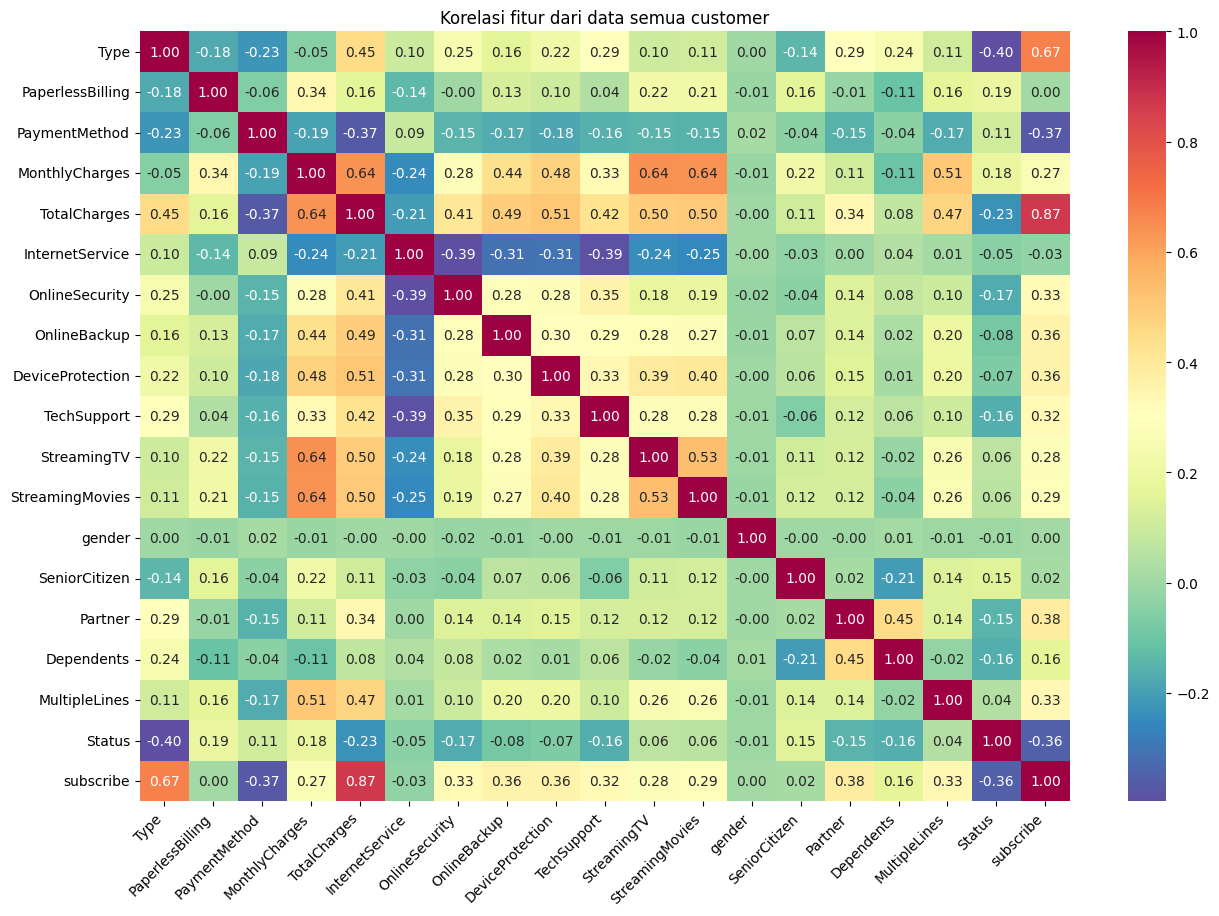

In [186]:
#Menjalankan fungsi correlation
correlation(merged_data_full,'Korelasi fitur dari data semua customer')

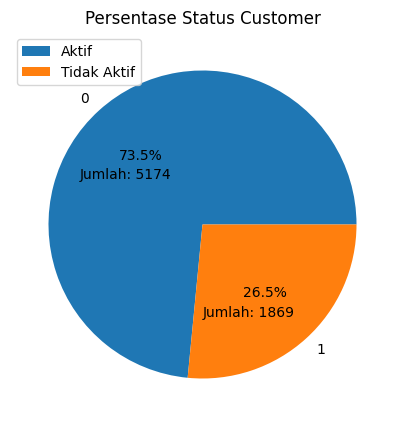

In [187]:
# Dataset kolom status
status =merged_data_full['Status'].value_counts()

# Menghitung jumlah nilai 0 dan 1
count_0 = status[0]
count_1 = status[1]

# Label dan nilai untuk grafik pie
labels = ['0', '1']
values = [count_0, count_1]

# Membuat grafik pie
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Memberikan judul pada grafik
plt.title('Persentase Status Customer')

plt.text(-0.5, 0.3, f'Jumlah: {count_0}', ha='center')
plt.text(0.3, -0.6, f'Jumlah: {count_1}', ha='center')

legend_labels = ['Aktif', 'Tidak Aktif']
plt.legend(legend_labels)

# Menampilkan grafik pie
plt.show()

In [188]:
#Memisahkan dataset yang masih berlangganan dengan tidak
merge_data_end = merged_data_full[merged_data_full['Status'] == 0]
merge_data_still = merged_data_full[merged_data_full['Status'] == 1]

### Customer end contract

In [189]:
merge_data_end.sample(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Status,subscribe
3893,5816-SCGFC,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,51.30,419.35,DSL,No,...,No,No,No,Female,1,No,No,No,0,215
2759,1194-SPVSP,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),19.65,19.65,No,No,...,No,No,No,Male,0,No,No,No,0,31


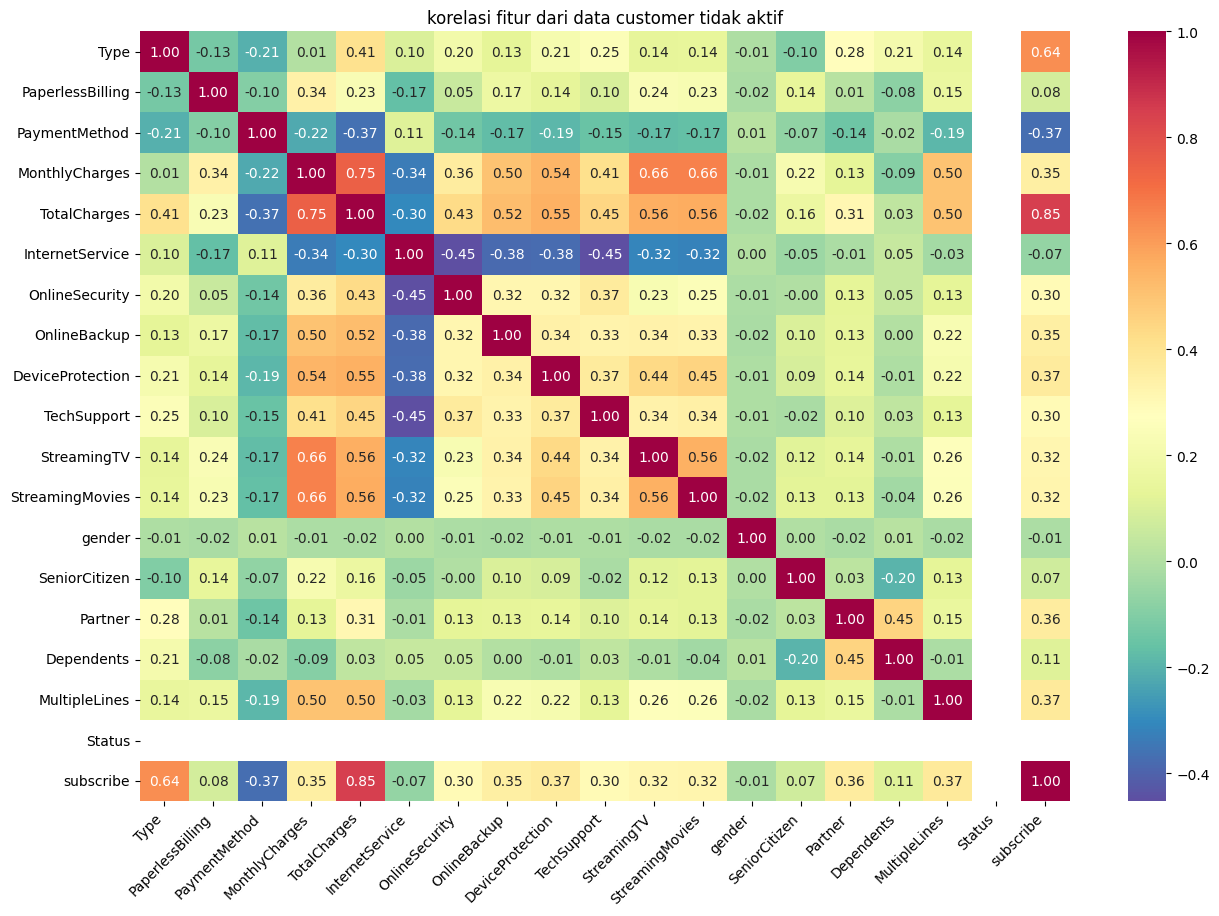

In [190]:
correlation(merge_data_end,'korelasi fitur dari data customer tidak aktif')

In [191]:
merge_data_end.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'Status', 'subscribe'],
      dtype='object')

In [192]:
columns = [['PaperlessBilling','PaymentMethod','gender','Partner']]

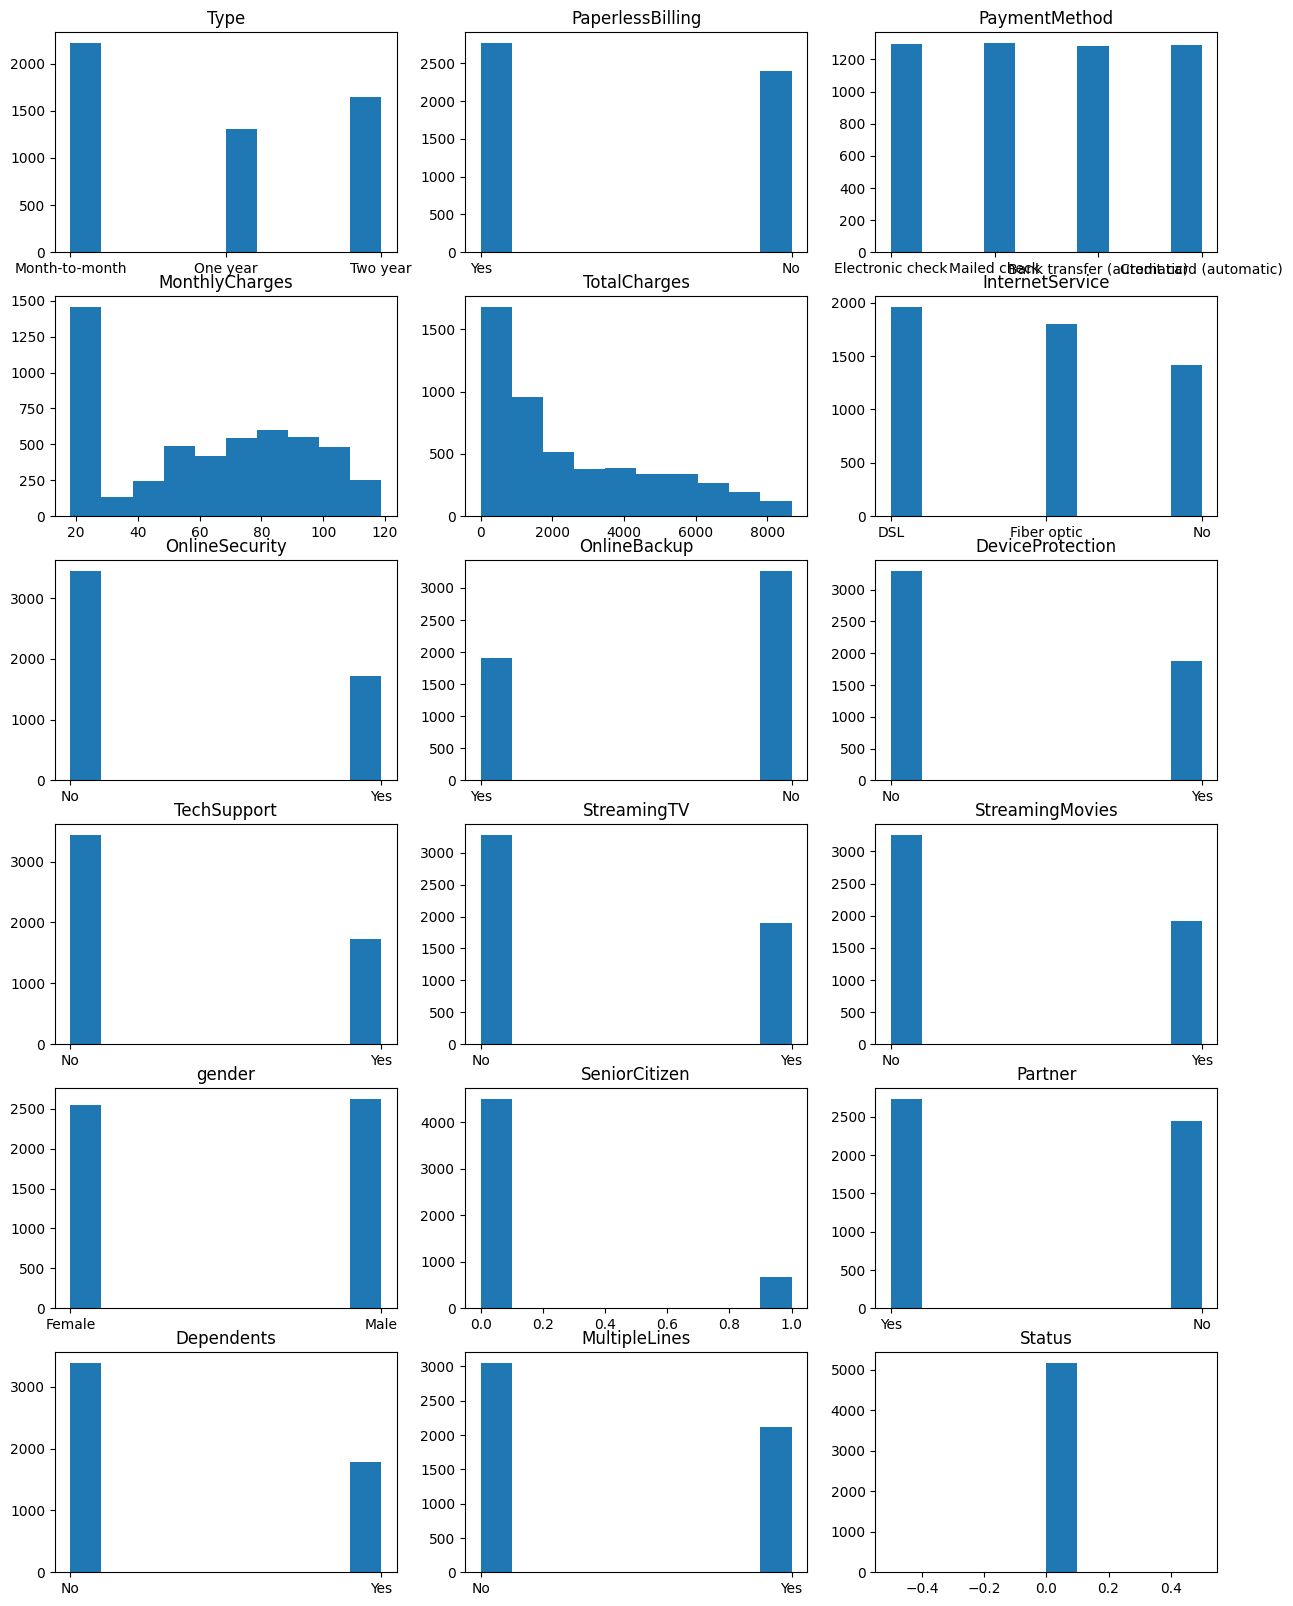

In [193]:
plt.figure(figsize=(15,20))
for row in range(0,18):
    plt.subplot(6,3,row+1).set_title(f"{merge_data_end.columns[row+3]}")
    plt.hist(merge_data_end[merge_data_end.columns[row+3]])
plt.show()

### Customer aktif

In [194]:
merge_data_still.sample(2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Status,subscribe
4746,0637-KVDLV,2019-08-01,2019-10-01,Month-to-month,Yes,Electronic check,76.5,162.45,Fiber optic,No,...,No,No,No,Male,0,No,No,Yes,1,61
3136,3884-HCSWG,2018-06-01,2019-11-01,Month-to-month,Yes,Electronic check,70.0,1144.50,Fiber optic,No,...,No,No,No,Female,0,No,No,No,1,518


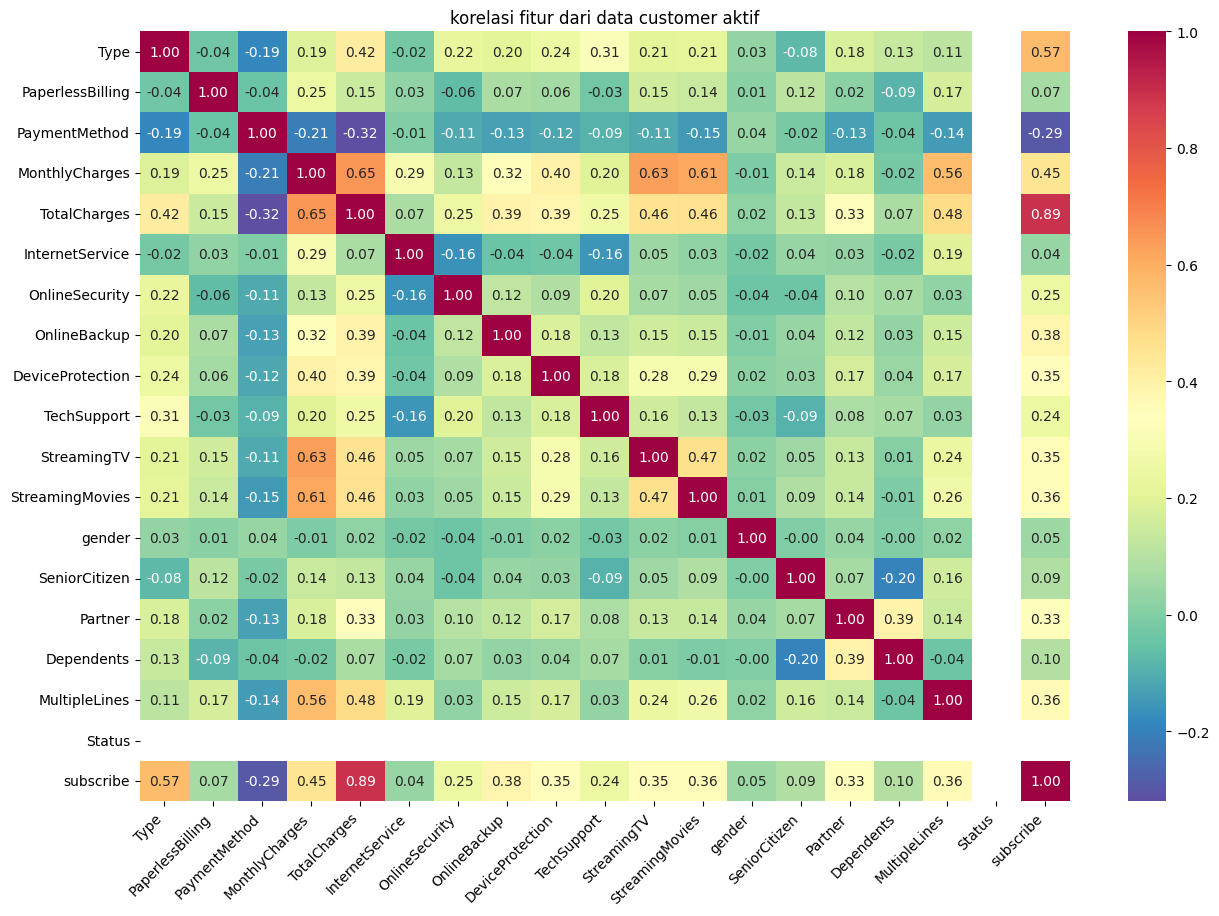

In [195]:
correlation(merge_data_still,'korelasi fitur dari data customer aktif')

## Kesimpulan EDA

Dari Hasil EDA di atas di dapatkan bahwa :
1. Jumlah Customer yang memilih untuk berhenti adalah `1869` sedangkan untuk customer yang masih aktif adalah 5174, yang menandakan bahwa data tersebut memilik variabel target yang imbalance
2. Setelah menggabungkan seluruh dataset yang dimana Customer nya sudah berhenti, ada beberapa poin yang sangat menonjol/ karakteristik tertentu yang dapat membuat customer berhenti. yaitu fitur **Type, Total_charges, Subscription_month,Internet_service,Tech_Support,Senior_Citizen,Dependents**
3. Jika kita melihat dari grafik Korelasi fitur dari data semua customer pada bagian Status, terdapat korelasi positif '0.40' terhadap type, yang menandakan bahwa, customer yang masih aktif atau tidak cukup berkaitan erat dengan type contract yang di ambil, jika customer memilih contract month to month, besar kemungkinan customer tersebut akan berhenti.

Dari fitur fitur tersebut kedepan nya akan dilakukan sebuah klasifikasi kembali menggunakan machine learning untuk menentukan ciri ciri customer yang masih aktif dan berpotensi untuk berhenti, sehingga perusahaan dapat memberikan kode promosi dan opsi paket khusus kepada customer tersebut.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰

## Machine Learning

In [196]:
#Fungsi untuk membuat data train di upsample
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)

    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345
    )

    return X_upsampled, y_upsampled

In [197]:
#Fungsi untuk membuat data train di downsample
def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)]
        + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)]
        + [y_ones])

    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)

    return X_downsampled, y_downsampled


### Split data

In [200]:
#Mengambil fitur yang akan di lakukan label
X_label = merged_data_full.drop(columns = ['customerID','BeginDate','EndDate','MonthlyCharges','TotalCharges'])

#melakukan labeling pada fitur yang dibutuhkan agar merubah nilai kategori menjadi numerik
encoder = OrdinalEncoder()
X_label = pd.DataFrame(encoder.fit_transform(X_label),
                 columns=X_label.columns)

In [201]:
X_label.sample()

,Type,PaperlessBilling,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Status,subscribe
6412,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,155.0


In [203]:
#Mengambil fitur yang akan di scaling menjadi range 0-1
X_scale = merged_data_full[['MonthlyCharges','TotalCharges']]

In [204]:
#memasukan variabel dengan fitur label ke variabel yang akan digunakan dalam machine learning
data_ml = X_label

#Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#menambahkan variabel dengan fitur scaling ke variabel yang akan digunakan dalam machine learning
data_ml[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_scale)

In [209]:
#Memisahkan fitur dan target
X = data_ml.drop(columns=['Status'])
y = data_ml['Status']

In [210]:
#Melakukan split untuk data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(f'jumlah ukuran X_train {X_train.shape}')
print(f'jumlah ukuran X_test {X_test.shape}')
print(f'jumlah ukuran y_train {y_train.shape}')
print(f'jumlah ukuran y_test {y_test.shape}')

jumlah ukuran X_train (6338, 18)
jumlah ukuran X_test (705, 18)
jumlah ukuran y_train (6338,)
jumlah ukuran y_test (705,)


### Fungsi Evaluate_model

In [211]:
#Fungsi untuk membuat evaluasi model dengan metrik AUC-ROC dan grafik kurva ROC
#Sekaligus memasukan hasil evaluasi kedalam file hasil.csv
def evaluate_model(models,data, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    start_time = time.time()
    #Data
    train_features = X_train
    train_target = y_train
    test_features = X_test
    test_target = y_test

    #Data jika Upsample/Downsample
    if data == 'upsample':
      train_features, train_target = upsample(X_train, y_train, 2)
    if data == 'downsample':
      train_features, train_target = downsample(X_train, y_train, 0.4)

    # Membuat model
    model = models
    # Melatih model
    model.fit(train_features, train_target)

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Skor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Kurva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # menetapkan persilangan untuk beberapa ambang batas
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(4)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    # Menampilkan hasil
    execution_time = time.time() - start_time
    #Menambahkan hasil ke datasets results dan menyimpan nya dalam bentuk csv
    list_result = [[str(models),data,
              df_eval_stats['test'][0],df_eval_stats['test'][1],df_eval_stats['test'][3],
              execution_time]]
    result = pd.DataFrame(list_result,columns=[['model','data','accuracy','f1_score','auc_roc','execution_time']])
    result.to_csv('hasil.csv', mode='a', header=False, index=False)
    print()
    print('5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC')

    return pd.read_csv(path_result).sort_values(by='auc_roc',ascending=False).head(5)

### Sklearn

#### Random Forest

           train    test
Accuracy  0.9989  0.8170
F1        0.9979  0.6031
APS       0.9999  0.7608
ROC AUC   1.0000  0.8814

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
126,RandomForestClassifier(),None,0.817000,0.603100,0.881400,1.449587
104,<catboost.core.CatBoostClassifier object at 0x...,None,0.811183,0.596136,0.863098,2.710536
125,<catboost.core.CatBoostClassifier object at 0x...,None,0.810000,0.600000,0.860000,2.779004
124,"LGBMClassifier(boosting_type='goss', learning_...",downsample,0.760000,0.660000,0.860000,0.391850
123,"XGBClassifier(base_score=None, booster=None, c...",upsample,0.790000,0.660000,0.860000,3.027939


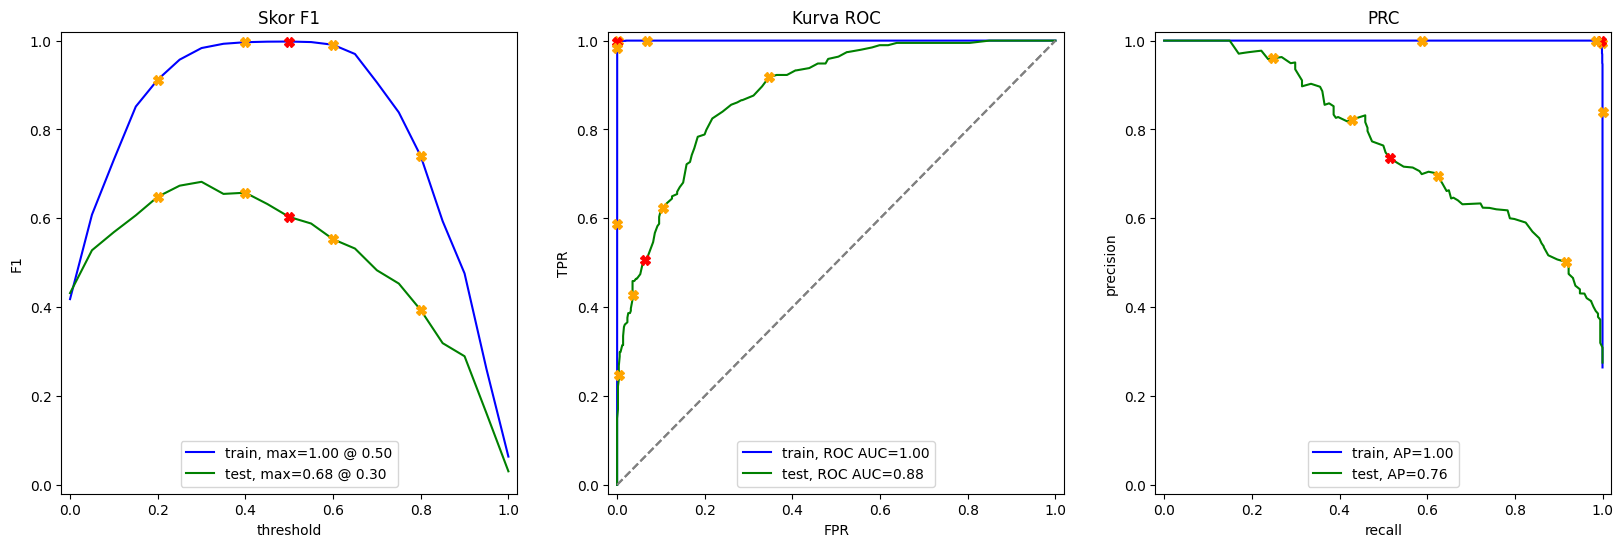

In [212]:
evaluate_model(RandomForestClassifier(),'None')

#### Linear Regression

           train    test
Accuracy  0.7446  0.7745
F1        0.7380  0.6667
APS       0.8159  0.6891
ROC AUC   0.8386  0.8676

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
126,RandomForestClassifier(),None,0.817000,0.603100,0.881400,1.449587
128,LogisticRegression(random_state=12345),downsample,0.774500,0.666700,0.867600,0.388547
127,LogisticRegression(random_state=12345),downsample,0.774500,0.666700,0.867600,0.717663
104,<catboost.core.CatBoostClassifier object at 0x...,None,0.811183,0.596136,0.863098,2.710536
125,<catboost.core.CatBoostClassifier object at 0x...,None,0.810000,0.600000,0.860000,2.779004


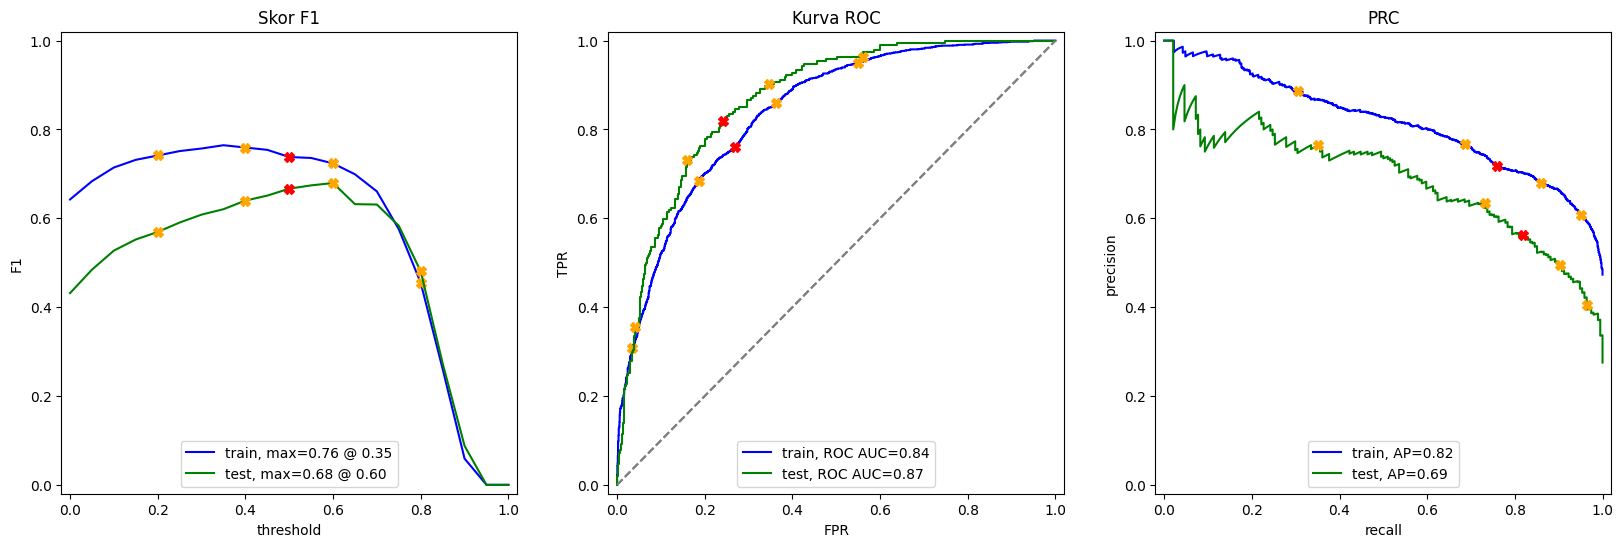

In [214]:
evaluate_model(LogisticRegression(random_state=12345),'downsample')

#### Decission Tree

           train    test
Accuracy  0.8209  0.7589
F1        0.8203  0.6444
APS       0.8970  0.6528
ROC AUC   0.9126  0.8409

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
126,RandomForestClassifier(),None,0.817000,0.603100,0.881400,1.449587
128,LogisticRegression(random_state=12345),downsample,0.774500,0.666700,0.867600,0.388547
127,LogisticRegression(random_state=12345),downsample,0.774500,0.666700,0.867600,0.717663
104,<catboost.core.CatBoostClassifier object at 0x...,None,0.811183,0.596136,0.863098,2.710536
124,"LGBMClassifier(boosting_type='goss', learning_...",downsample,0.760000,0.660000,0.860000,0.391850


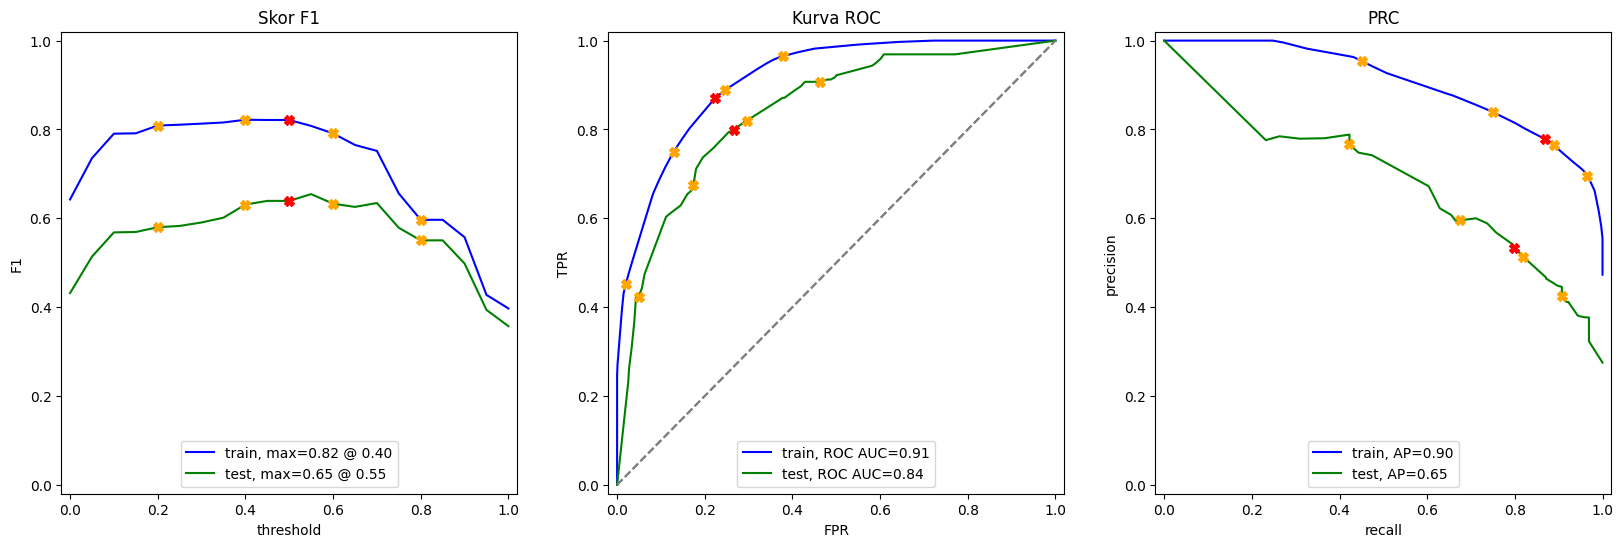

In [215]:
evaluate_model(DecisionTreeClassifier(random_state=12345,max_depth=8),'downsample')

#### GradientBoosting

           train    test
Accuracy  0.8167  0.8298
F1        0.8091  0.7297
APS       0.9023  0.8310
ROC AUC   0.9066  0.9147

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221
126,RandomForestClassifier(),None,0.8170,0.6031,0.8814,1.449587


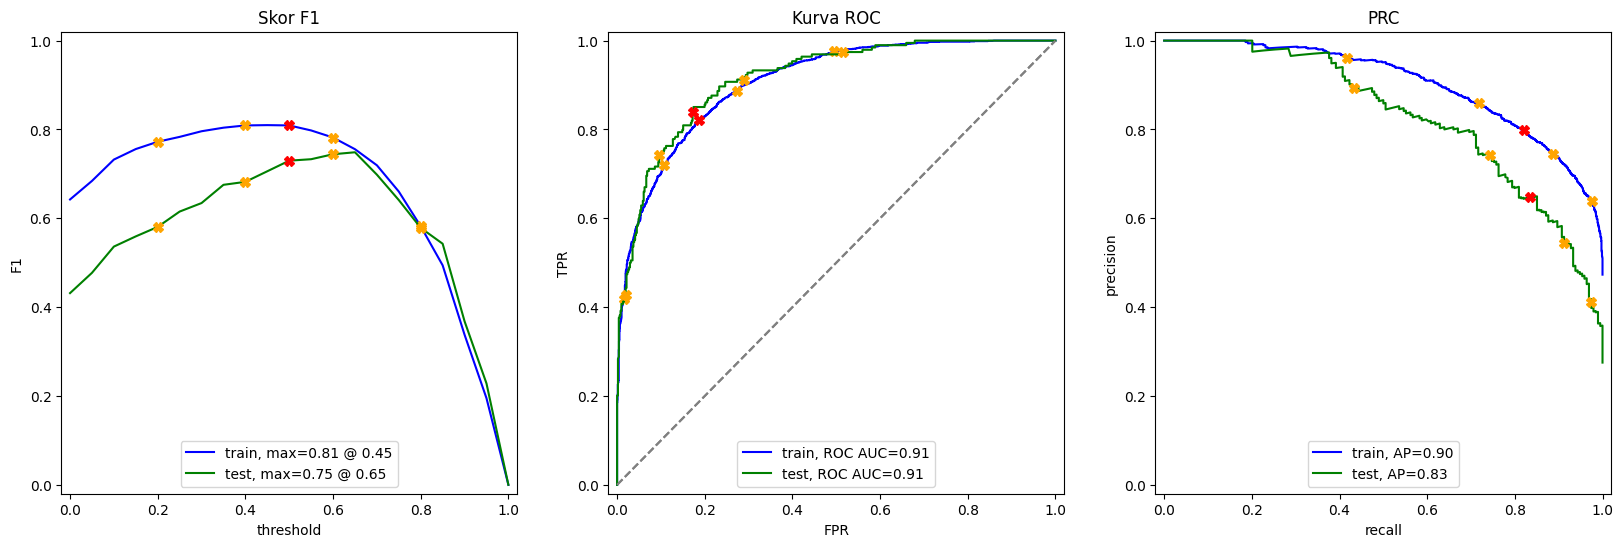

In [219]:
evaluate_model(GradientBoostingClassifier(random_state=12345,max_depth=3),'downsample')

#### SVC

           train    test
Accuracy  0.7578  0.7589
F1        0.4781  0.5029
APS       0.5643  0.6434
ROC AUC   0.7526  0.7951

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221
126,RandomForestClassifier(),None,0.8170,0.6031,0.8814,1.449587


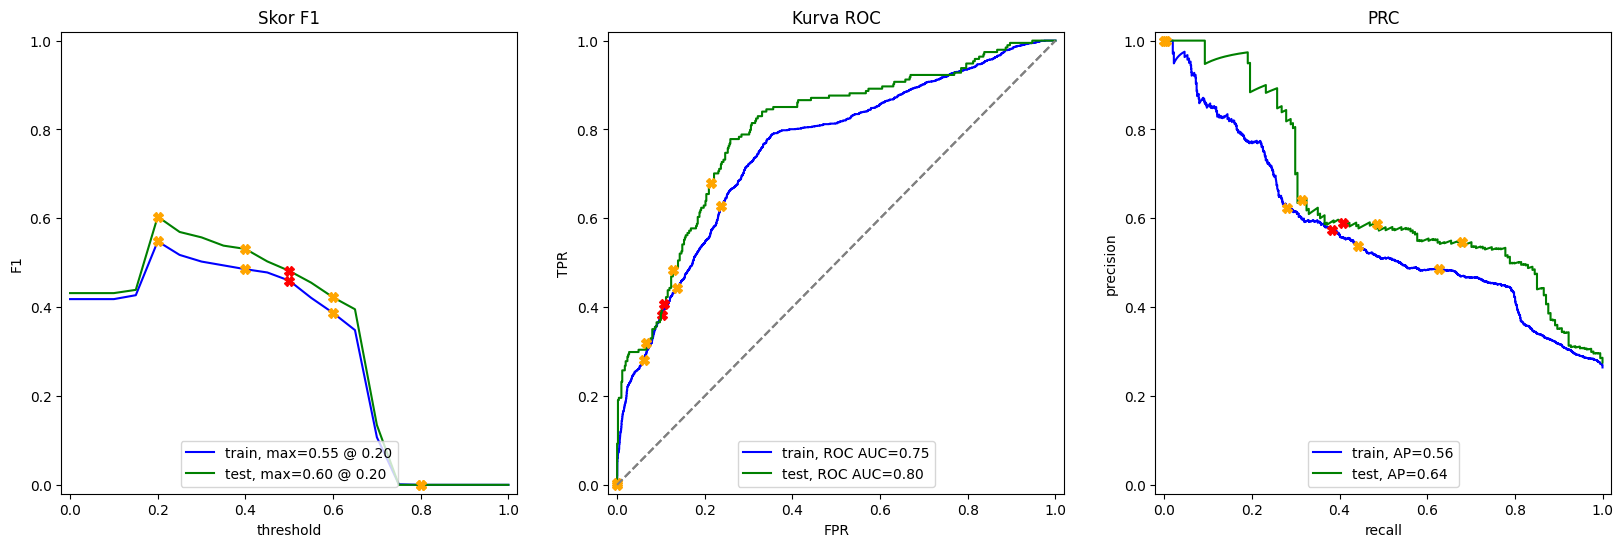

In [220]:
evaluate_model(SVC(probability=True,random_state=12345),'None')

#### KNN

           train    test
Accuracy  0.8652  0.8213
F1        0.8363  0.6897
APS       0.9055  0.6949
ROC AUC   0.9477  0.8685

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221
126,RandomForestClassifier(),None,0.8170,0.6031,0.8814,1.449587


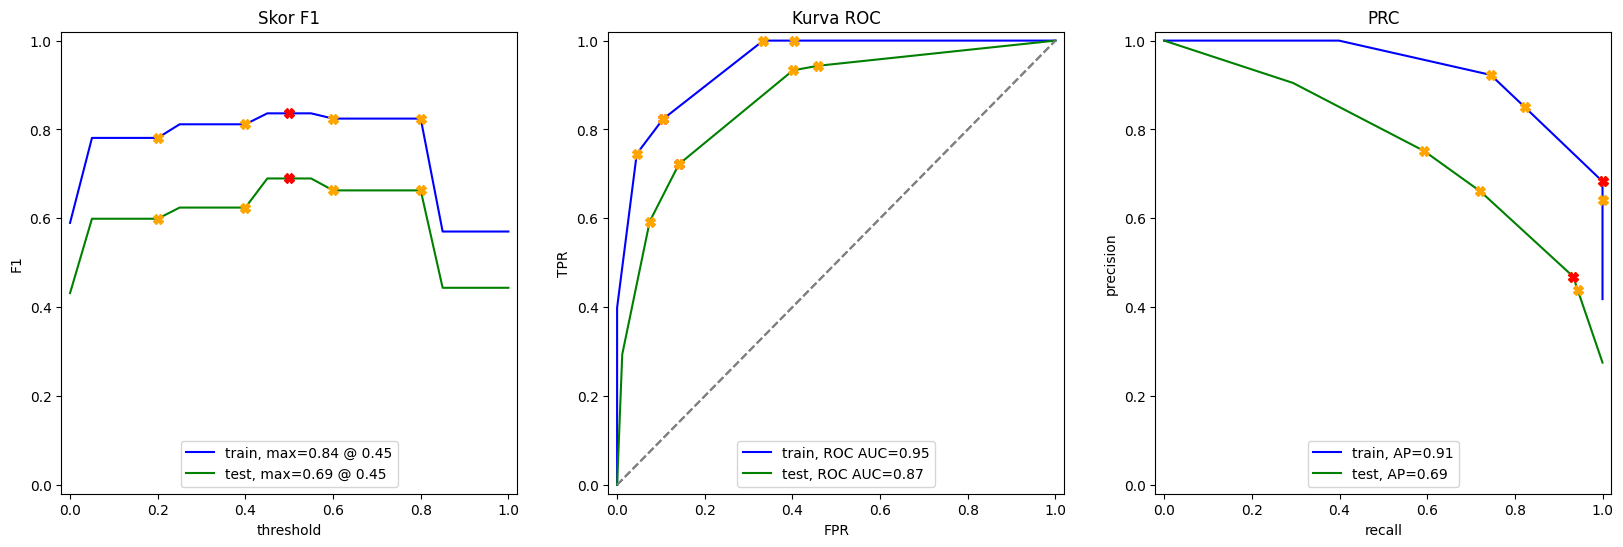

In [221]:
evaluate_model(KNeighborsClassifier(),'upsample')

### XGBoost

           train    test
Accuracy  0.8218  0.8468
F1        0.7836  0.7391
APS       0.8829  0.8278
ROC AUC   0.9096  0.9118

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
136,"XGBClassifier(base_score=None, booster=None, c...",upsample,0.8468,0.7391,0.9118,2.606807
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221


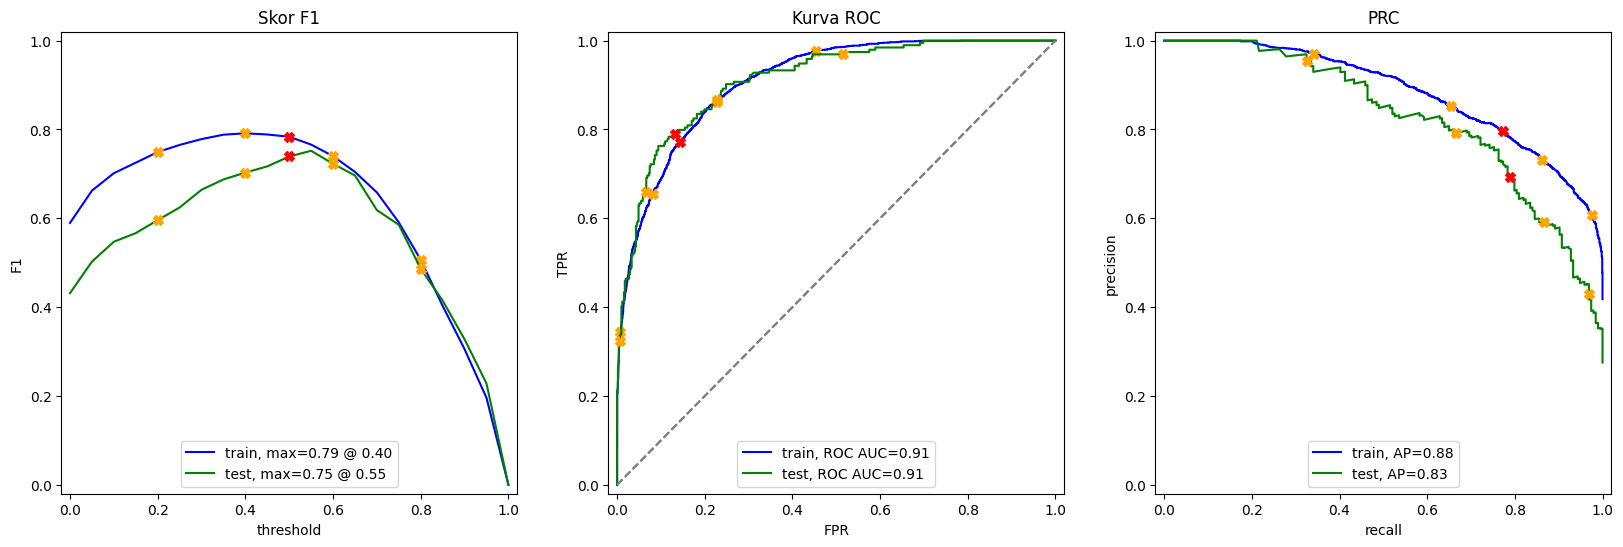

In [222]:
evaluate_model(xgb.XGBClassifier(max_depth=5,learning_rate=0.05,eval_metric=roc_auc_score ),'upsample')

### LGBM

           train    test
Accuracy  0.7946  0.8043
F1        0.7870  0.6947
APS       0.8800  0.7845
ROC AUC   0.8870  0.8907

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
136,"XGBClassifier(base_score=None, booster=None, c...",upsample,0.8468,0.7391,0.9118,2.606807
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221


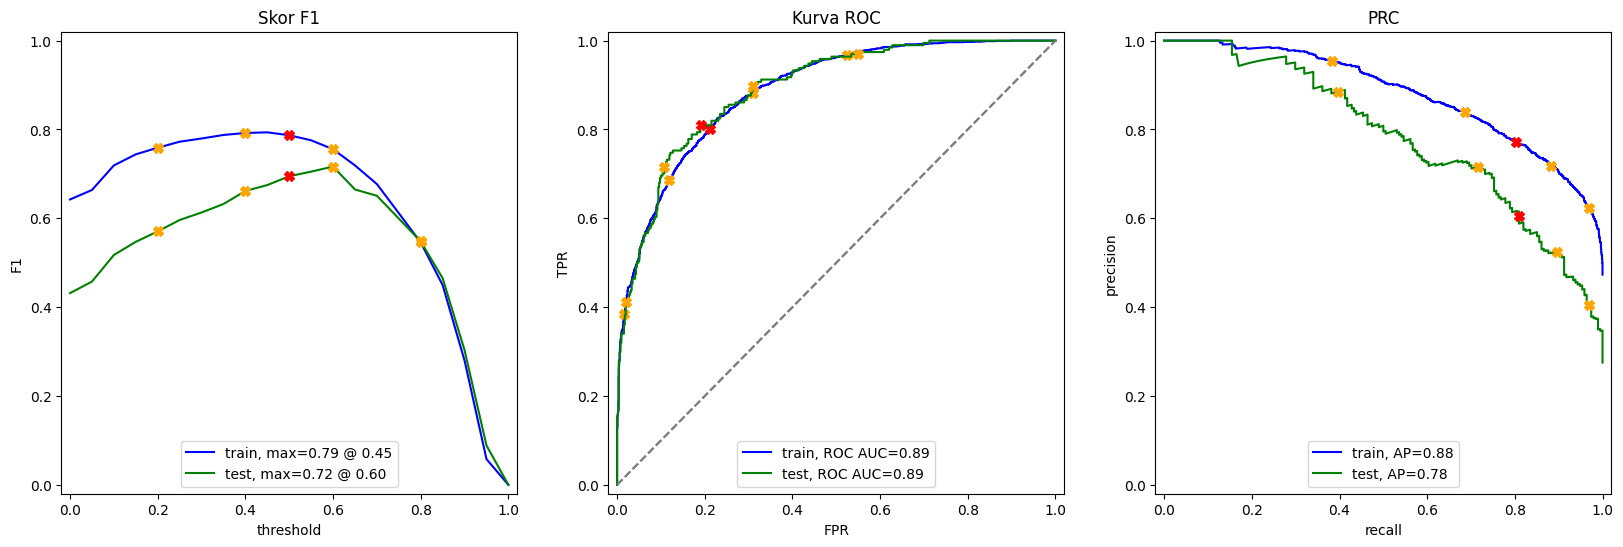

In [223]:
evaluate_model(lgb.LGBMClassifier(boosting_type='goss',learning_rate=0.04,num_leaves=10,random_state=12345),'downsample')

### CatBoost

           train    test
Accuracy  0.8369  0.8454
F1        0.6397  0.6727
APS       0.7699  0.8129
ROC AUC   0.8837  0.9045

5 Hasil tertinggi dari percobaan model Machine Learning berdasarkan AUC_ROC


,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
136,"XGBClassifier(base_score=None, booster=None, c...",upsample,0.8468,0.7391,0.9118,2.606807
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221


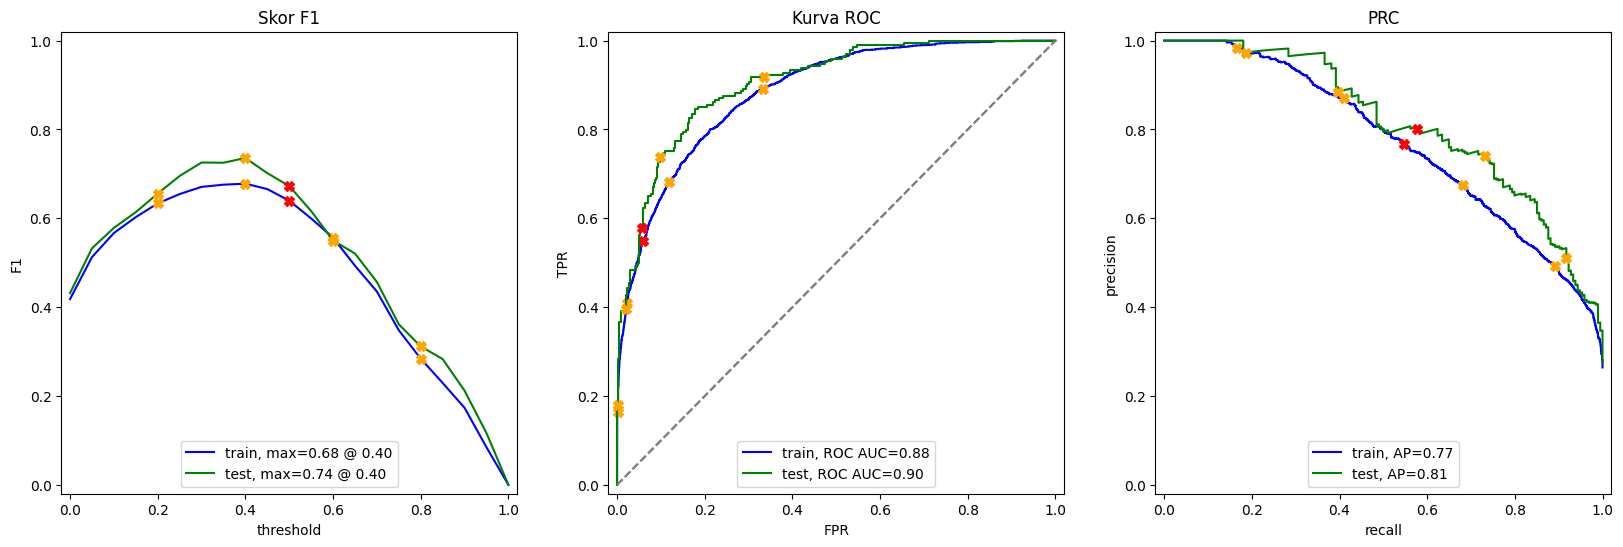

In [224]:
evaluate_model(CatBoostClassifier(random_state=12345,learning_rate=0.005,depth=5,verbose=0),'None')

### Neural Network

In [225]:

# Melakukan standarisasi fitur
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Membangun model Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics='AUC')

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Memprediksi probabilitas kelas positif
y_pred_proba = model.predict(X_test)

# Menghitung AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC-ROC: {auc_roc}")

Epoch 1/10
199/199 [==============================] - 2s 3ms/step - loss: 0.5452 - auc: 0.7451
Epoch 2/10
199/199 [==============================] - 1s 3ms/step - loss: 0.4598 - auc: 0.8087
Epoch 3/10
199/199 [==============================] - 1s 3ms/step - loss: 0.4452 - auc: 0.8211
Epoch 4/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4546 - auc: 0.8163
Epoch 5/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4303 - auc: 0.8309
Epoch 6/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4270 - auc: 0.8341
Epoch 7/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4282 - auc: 0.8338
Epoch 8/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4260 - auc: 0.8340
Epoch 9/10
199/199 [==============================] - 0s 2ms/step - loss: 0.4278 - auc: 0.8342
Epoch 10/10
23/23 [==============================] - 0s 1ms/step
AUC-ROC: 0.875360622995138


## Kesimpulan

In [226]:
df_result = pd.read_csv(path_result)

In [227]:
df_result.sort_values(by='auc_roc',ascending=False).head()

,model,data,accuracy,f1_score,auc_roc,execution_time
132,"GradientBoostingClassifier(max_depth=4, random...",downsample,0.8227,0.7228,0.9185,3.435444
130,"GradientBoostingClassifier(max_depth=5, random...",downsample,0.8213,0.7123,0.9154,1.300510
133,GradientBoostingClassifier(random_state=12345),downsample,0.8298,0.7297,0.9147,1.194892
136,"XGBClassifier(base_score=None, booster=None, c...",upsample,0.8468,0.7391,0.9118,2.606807
131,"GradientBoostingClassifier(max_depth=2, random...",downsample,0.8227,0.7228,0.9064,1.115221


Dari Data yang kita dapat, setelah melakukan banyak nya melatih model machine learning di dapat lah 5 hasil terbaik dari metric auc_roc.
dan hasil nya adalah auc_roc tertinggi sebesar 0.918 dan accuracy sebesar 0.822, dengan model machine learning dari Gradient Boosting.

seluruh riwayat dari hasil yang didapat bisa di lihat pada file `hasil.csv`.

## Laporan

1. Memahami Tujuan Proyek:
   Saya memulai dengan memahami tujuan proyek klasifikasi yang diberikan dan menentukan apa yang ingin dicapai melalui model machine learning, pada proyek ini goals yang di inginkan adalah `Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat churn klien mereka.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰`

2. Eksplorasi Data (Exploratory Data Analysis, EDA):
   Melakukan EDA pada dataset untuk memahami karakteristik data, melihat distribusi fitur, melihat hubungan antara fitur-fitur, mengidentifikasi missing values, dan memeriksa kesalahan tipe data. EDA membantu dalam pemahaman awal data dan memungkinkan identifikasi langkah-langkah preprocessing yang diperlukan.

3. Preprocessing Data:
   Melakukan preprocessing data seperti mengisi missing values, mengganti tipe data, melakukan encoding pada fitur kategorikal, dan melakukan scaling atau normalisasi pada fitur numerikal. Preprocessing data penting untuk mempersiapkan data agar dapat diolah oleh model machine learning.

4. Pemisahan Data:
   Memisahkan data menjadi data latih (training data) dan data uji (test data). Data latih digunakan untuk melatih model, sementara data uji digunakan untuk melakukan evaluasi performa model yang telah dilatih.
   
7. Pembuatan Fungsi Evaluasi:
   Membuat fungsi evaluasi yang mengotomatisasi perhitungan metrik evaluasi, seperti ROC AUC, akurasi, dan f1-score. Fungsi ini membantu dalam perbandingan performa model secara efisien dan objektif. dan fungsi ini juga yang menjadi langkah kunci saya untuk menyelesaikan proyek ini dengan optimal/otomatis dalam tahap mendapatkan evaluasi dari beberapa model machine learning

6. Memilih dan melakukan percobaan Model Machine Learning:
   Memilih beberapa model machine learning yang sesuai dengan tipe masalah klasifikasi, seperti Random Forest, XGBoost, CatBoost, atau model neural network. Langkah ini melibatkan pemilihan model-model yang potensial berdasarkan karakteristik data dan evaluasi performa awal. dan kendala yang didapat disini adalah sulitnya mendapatkan hasil dari ROC diatas 0.9, dan juga selain dari metrik utama ROC, metrik lain seperti akurasi dan F1 skor mendapatkan hasil yang masih kurang bagus.

9. Penyempurnaan Model:
   Mengoptimalkan parameter-parameter model dengan melakukan tuning hyperparameter, pada tahap ini cukup kesulitan dalam hal mengotak atik tuning hyperparameter nya agar mendapatkan hasil yang maksimal.

10. Evaluasi Hasil:
    Mengevaluasi hasil dari setiap model dengan membandingkan metrik evaluasi, dan memasukan hasil dari setiap evaluasi kedalam satu file `hasil.csv` agar dapat dibandingkan dan dilakukan track record dari melakukan tuning hyperparameter,

11. Model Terbaik:
    Setelah melakukan banyak percobaan dan disimpan dalam file `hasil.csv`, didapatkan model CatBoost mendapatkan hasil tertinggi untuk metrik ROC yaitu sebesar 0.918.